In [6]:
# Exploratory Data Analysis (EDA) en Python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn.preprocessing import StandardScaler

In [7]:
# Configuración para que las gráficas se vean bien
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


df = pd.read_csv('../data/raw/work_absenteeism_original.csv')

In [8]:
# Información básica
print("=== Información del dataset ===")
print(df.info())

=== Información del dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int

In [9]:
print("\n=== Primeras filas ===")
print(df.head())


=== Primeras filas ===
   ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average/day  ...  Disciplinary failur

In [10]:
print("\n=== Estadísticas descriptivas ===")
print(df.describe())


=== Estadísticas descriptivas ===
               ID  Reason for absence  Month of absence  Day of the week  \
count  740.000000          740.000000        740.000000       740.000000   
mean    18.017568           19.216216          6.324324         3.914865   
std     11.021247            8.433406          3.436287         1.421675   
min      1.000000            0.000000          0.000000         2.000000   
25%      9.000000           13.000000          3.000000         3.000000   
50%     18.000000           23.000000          6.000000         4.000000   
75%     28.000000           26.000000          9.000000         5.000000   
max     36.000000           28.000000         12.000000         6.000000   

          Seasons  Transportation expense  Distance from Residence to Work  \
count  740.000000              740.000000                       740.000000   
mean     2.544595              221.329730                        29.631081   
std      1.111831               66.952223     

In [11]:
# Valores únicos de la columna 'Reason for absence'
unique_reasons_sorted = sorted(df['Reason for absence'].unique())
print("Valores únicos de 'Reason for absence' ordenados:")
print(unique_reasons_sorted)

count_zero = (df['Reason for absence'] == 0).sum()
print(f"Número de registros con 0 en 'Reason for absence': {count_zero}")

Valores únicos de 'Reason for absence' ordenados:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28]
Número de registros con 0 en 'Reason for absence': 43


In [12]:
# 2️⃣ Información básica
print("=== Información del dataset ===")
print(df.info())

=== Información del dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int

In [13]:
# Columnas a analizar
columns_to_check = [
    'ID',
    'Reason for absence',
    'Month of absence',
    'Day of the week',
    'Seasons',
    'Hit target',
    'Disciplinary failure',
    'Education',
    'Transportation expense',
    'Distance from Residence to Work',
    'Service time',
    'Age',
    'Work load Average/day',
    'Weight',
    'Height',
    'Body mass index',
    'Absenteeism time in hours'
]

# Obtener y mostrar valores únicos ordenados por columna
for col in columns_to_check:
    unique_sorted = sorted(df[col].unique())
    print(f"Valores únicos de '{col}' ordenados:")
    print(unique_sorted)
    print("-" * 50)


Valores únicos de 'ID' ordenados:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
--------------------------------------------------
Valores únicos de 'Reason for absence' ordenados:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28]
--------------------------------------------------
Valores únicos de 'Month of absence' ordenados:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
--------------------------------------------------
Valores únicos de 'Day of the week' ordenados:
[2, 3, 4, 5, 6]
--------------------------------------------------
Valores únicos de 'Seasons' ordenados:
[1, 2, 3, 4]
--------------------------------------------------
Valores únicos de 'Hit target' ordenados:
[81, 87, 88, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
--------------------------------------------------
Valores únicos de 'Disciplinary failure' ordenados:
[0, 1]
----------

In [14]:
# Contar frecuencia de cada valor único en la columna
absenteeism_counts = df['Absenteeism time in hours'].value_counts().sort_index()

# Mostrar resultados
print(absenteeism_counts)

Absenteeism time in hours
0       44
1       88
2      157
3      112
4       60
5        7
7        1
8      208
16      19
24      16
32       6
40       7
48       1
56       2
64       3
80       3
104      1
112      2
120      3
Name: count, dtype: int64


In [15]:
df.drop(columns=['ID'], inplace=True)

In [16]:
#Vamos a mapear la columna Reason for absence para que muestre informacion significativa

# Diccionario de mapeo
reason_map = {
    0: np.nan,
    1: "1 Certain infectious and parasitic diseases",
    2: "2 Neoplasms",
    3: "3 Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism",
    4: "4 Endocrine, nutritional and metabolic diseases",
    5: "5 Mental and behavioural disorders",
    6: "6 Diseases of the nervous system",
    7: "7 Diseases of the eye and adnexa",
    8: "8 Diseases of the ear and mastoid process",
    9: "9 Diseases of the circulatory system",
    10: "10 Diseases of the respiratory system",
    11: "11 Diseases of the digestive system",
    12: "12 Diseases of the skin and subcutaneous tissue",
    13: "13 Diseases of the musculoskeletal system and connective tissue",
    14: "14 Diseases of the genitourinary system",
    15: "15 Pregnancy, childbirth and the puerperium",
    16: "16 Certain conditions originating in the perinatal period",
    17: "17 Congenital malformations, deformations and chromosomal abnormalities",
    18: "18 Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified",
    19: "19 Injury, poisoning and certain other consequences of external causes",
    20: "20 External causes of morbidity and mortality",
    21: "21 Factors influencing health status and contact with health services",
    22: "22 Patient follow-up (CID)",
    23: "23 Medical consultation",
    24: "24 Blood donation",
    25: "25 Laboratory examination",
    26: "26 Unjustified absence",
    27: "27 Physiotherapy",
    28: "28 Dental consultation"
}

# Mapear la columna
df['Reason for absence'] = df['Reason for absence'].map(reason_map)

# 3. Month of absence: 1-12 a nombres de meses, 0 -> 'Missing'
month_map = {
    0: np.nan, 1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September',
    10: 'October', 11: 'November', 12: 'December'
}
df['Month of absence'] = df['Month of absence'].map(month_map)

# 4. Day of the week: Monday (2), Tuesday (3), ..., Friday (6)
day_map = {
    2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'
}
df['Day of the week'] = df['Day of the week'].map(day_map)

# 5. Seasons: summer (1), autumn (2), winter (3), spring (4)
seasons_map = {1: 'Summer', 2: 'Autumn', 3: 'Winter', 4: 'Spring'}
df['Seasons'] = df['Seasons'].map(seasons_map)

# 12. Disciplinary failure: yes=1; no=0
df['Disciplinary failure'] = df['Disciplinary failure'].map({0: 'No', 1: 'Yes'})

# 13. Education: high school (1), graduate (2), postgraduate (3), master and doctor (4)
education_map = {1: 'High school', 2: 'Graduate', 3: 'Postgraduate', 4: 'Master/Doctor'}
df['Education'] = df['Education'].map(education_map)

# 15. Social drinker: yes=1; no=0
df['Social drinker'] = df['Social drinker'].map({0: 'No', 1: 'Yes'})

# 16. Social smoker: yes=1; no=0
df['Social smoker'] = df['Social smoker'].map({0: 'No', 1: 'Yes'})

# Verificar cambios
print(df[['Month of absence', 'Day of the week', 'Seasons', 'Disciplinary failure', 'Education', 'Social drinker', 'Social smoker']].head())

# Verificar cambios
print(df['Reason for absence'].head())


  Month of absence Day of the week Seasons Disciplinary failure    Education  \
0             July         Tuesday  Summer                   No  High school   
1             July         Tuesday  Summer                  Yes  High school   
2             July       Wednesday  Summer                   No  High school   
3             July        Thursday  Summer                   No  High school   
4             July        Thursday  Summer                   No  High school   

  Social drinker Social smoker  
0            Yes            No  
1            Yes            No  
2            Yes            No  
3            Yes           Yes  
4            Yes            No  
0              26 Unjustified absence
1                                 NaN
2             23 Medical consultation
3    7 Diseases of the eye and adnexa
4             23 Medical consultation
Name: Reason for absence, dtype: object


In [17]:
# 3️ Valores faltantes
print("\n=== Valores faltantes por columna ===")
print(df.isnull().sum())


=== Valores faltantes por columna ===
Reason for absence                 43
Month of absence                    3
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 0
Work load Average/day               0
Hit target                          0
Disciplinary failure                0
Education                           0
Son                                 0
Social drinker                      0
Social smoker                       0
Pet                                 0
Weight                              0
Height                              0
Body mass index                     0
Absenteeism time in hours           0
dtype: int64


In [18]:
# Reemplazar Reason for absence por 'Disciplinary failure'
# cuando es NaN y Disciplinary failure == 'Yes'
mask = df['Reason for absence'].isna() & (df['Disciplinary failure'] == 'Yes')
df.loc[mask, 'Reason for absence'] = '0 Disciplinary failure'

In [19]:
# 3️⃣ Valores faltantes
print("\n=== Valores faltantes por columna ===")
print(df.isnull().sum())


=== Valores faltantes por columna ===
Reason for absence                 3
Month of absence                   3
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64


In [20]:
# Filtrar registros donde Reason for absence es null
missing_reason = df[df['Reason for absence'].isna()]

# Mostrar todas las columnas (en caso de truncamiento)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)  # quita el límite de filas, úsalo con cuidado si el dataset es grande

print(missing_reason)

    Reason for absence Month of absence Day of the week Seasons  \
737                NaN              NaN         Tuesday  Summer   
738                NaN              NaN       Wednesday  Autumn   
739                NaN              NaN          Friday  Winter   

     Transportation expense  Distance from Residence to Work  Service time  \
737                     118                               14            13   
738                     231                               35            14   
739                     179                               45            14   

     Age  Work load Average/day  Hit target Disciplinary failure    Education  \
737   40                271.219          95                   No  High school   
738   39                271.219          95                   No  High school   
739   53                271.219          95                   No  High school   

     Son Social drinker Social smoker  Pet  Weight  Height  Body mass index  \
737    1      

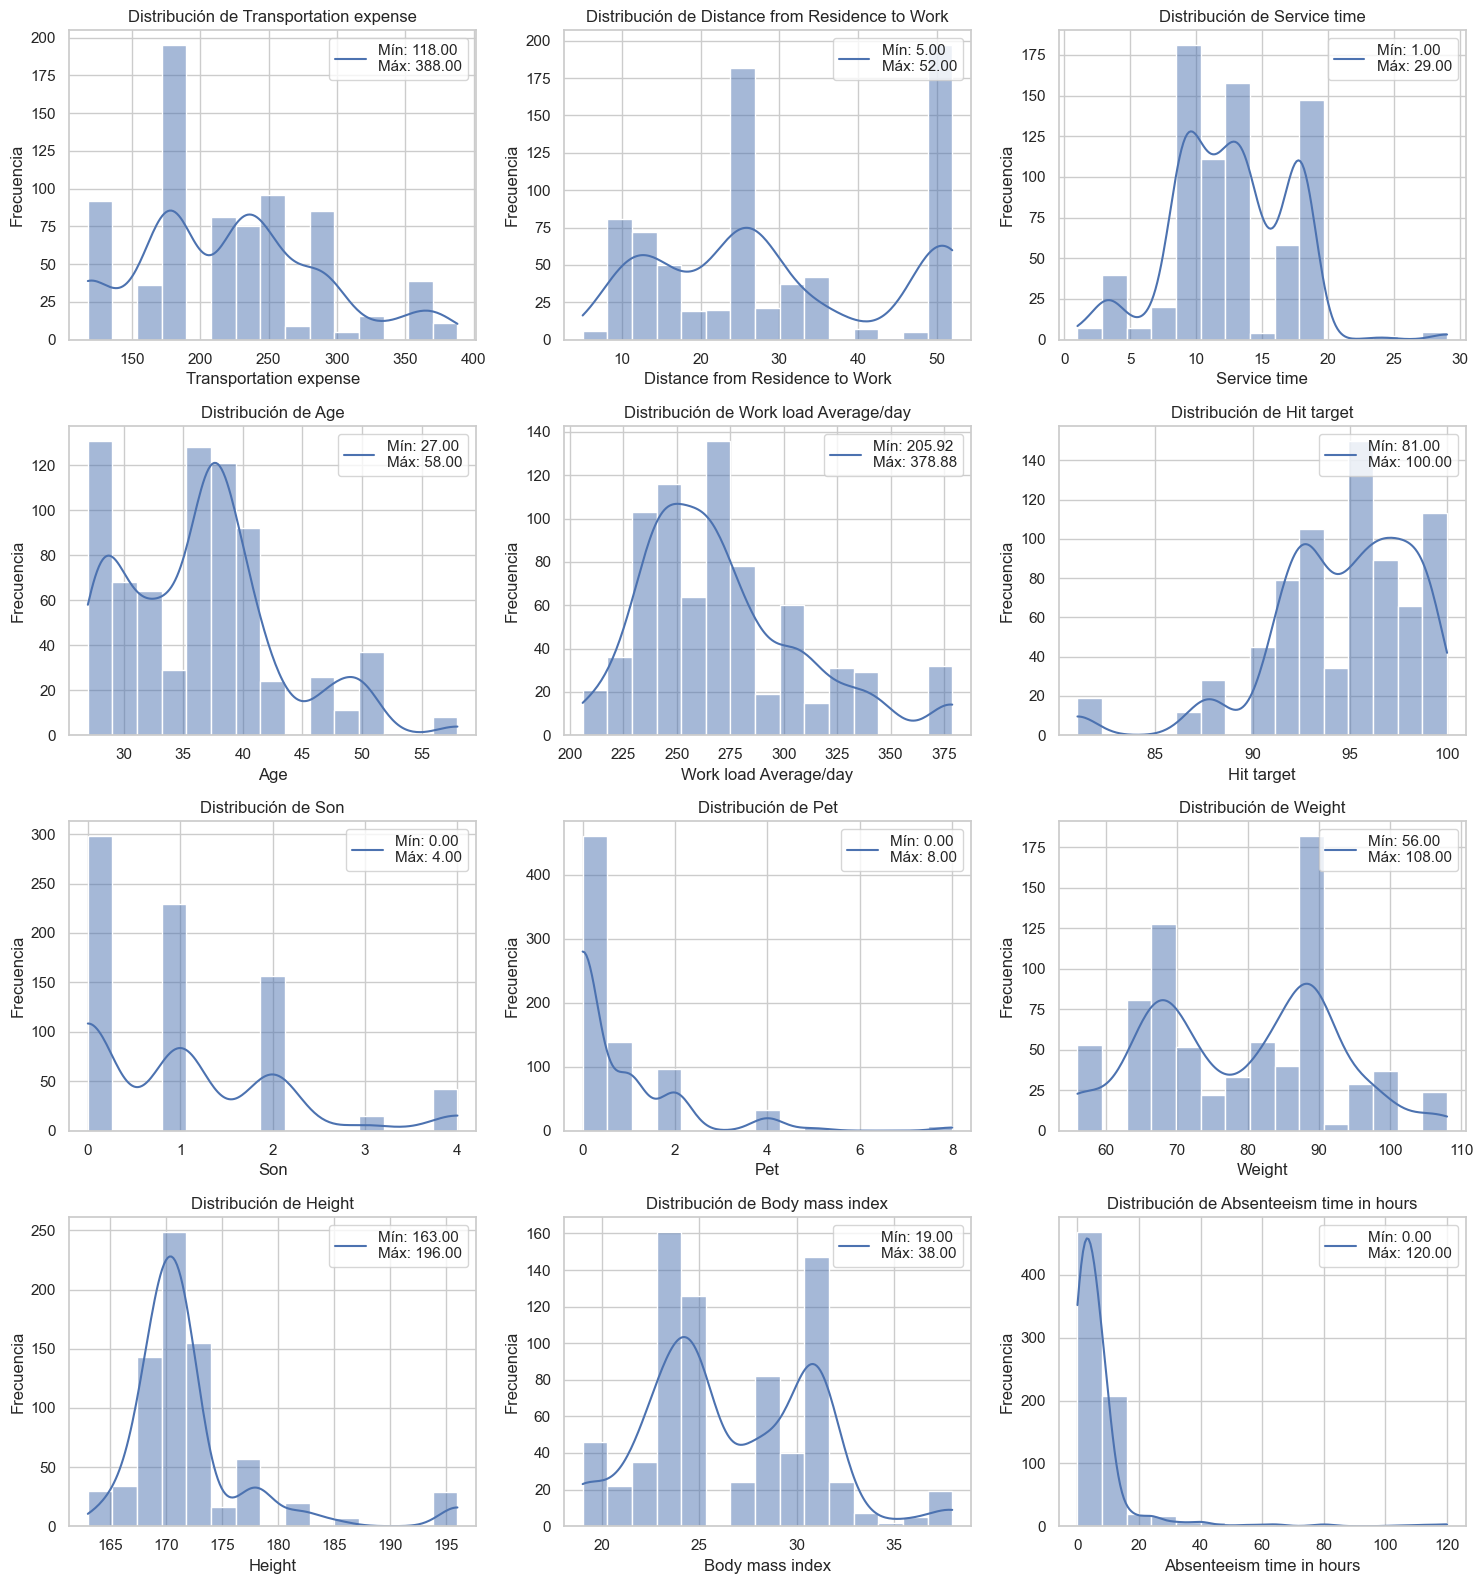

In [21]:
# 4️⃣ Distribución de variables numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

def plot_distributions(df, num_cols=None, per_row=3, bins=30):
    """
    Genera histogramas con KDE para visualizar la distribución de las variables numéricas.
    Incluye en la leyenda los valores mínimos y máximos de cada columna.

    Parámetros:
    -----------
    df : pandas.DataFrame
        DataFrame con los datos.
    num_cols : list, opcional
        Lista de columnas numéricas a graficar. Si no se especifica, toma todas las numéricas.
    per_row : int, opcional
        Número de gráficos por fila (default=3).
    bins : int, opcional
        Número de bins del histograma (default=30).
    """
    if num_cols is None:
        num_cols = df.select_dtypes(include=['float64', 'int64']).columns

    n = len(num_cols)
    rows = math.ceil(n / per_row)

    plt.figure(figsize=(5 * per_row, 4 * rows))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(rows, per_row, i)
        sns.histplot(df[col], kde=True, bins=bins)
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel("Frecuencia")

        # Calcular valores min y max
        min_val = df[col].min()
        max_val = df[col].max()

        # Mostrar en la leyenda
        plt.legend([f'Mín: {min_val:.2f}\nMáx: {max_val:.2f}'], loc='upper right', frameon=True)

    plt.tight_layout()
    plt.show()
    
plot_distributions(df, num_cols, 3, 15)

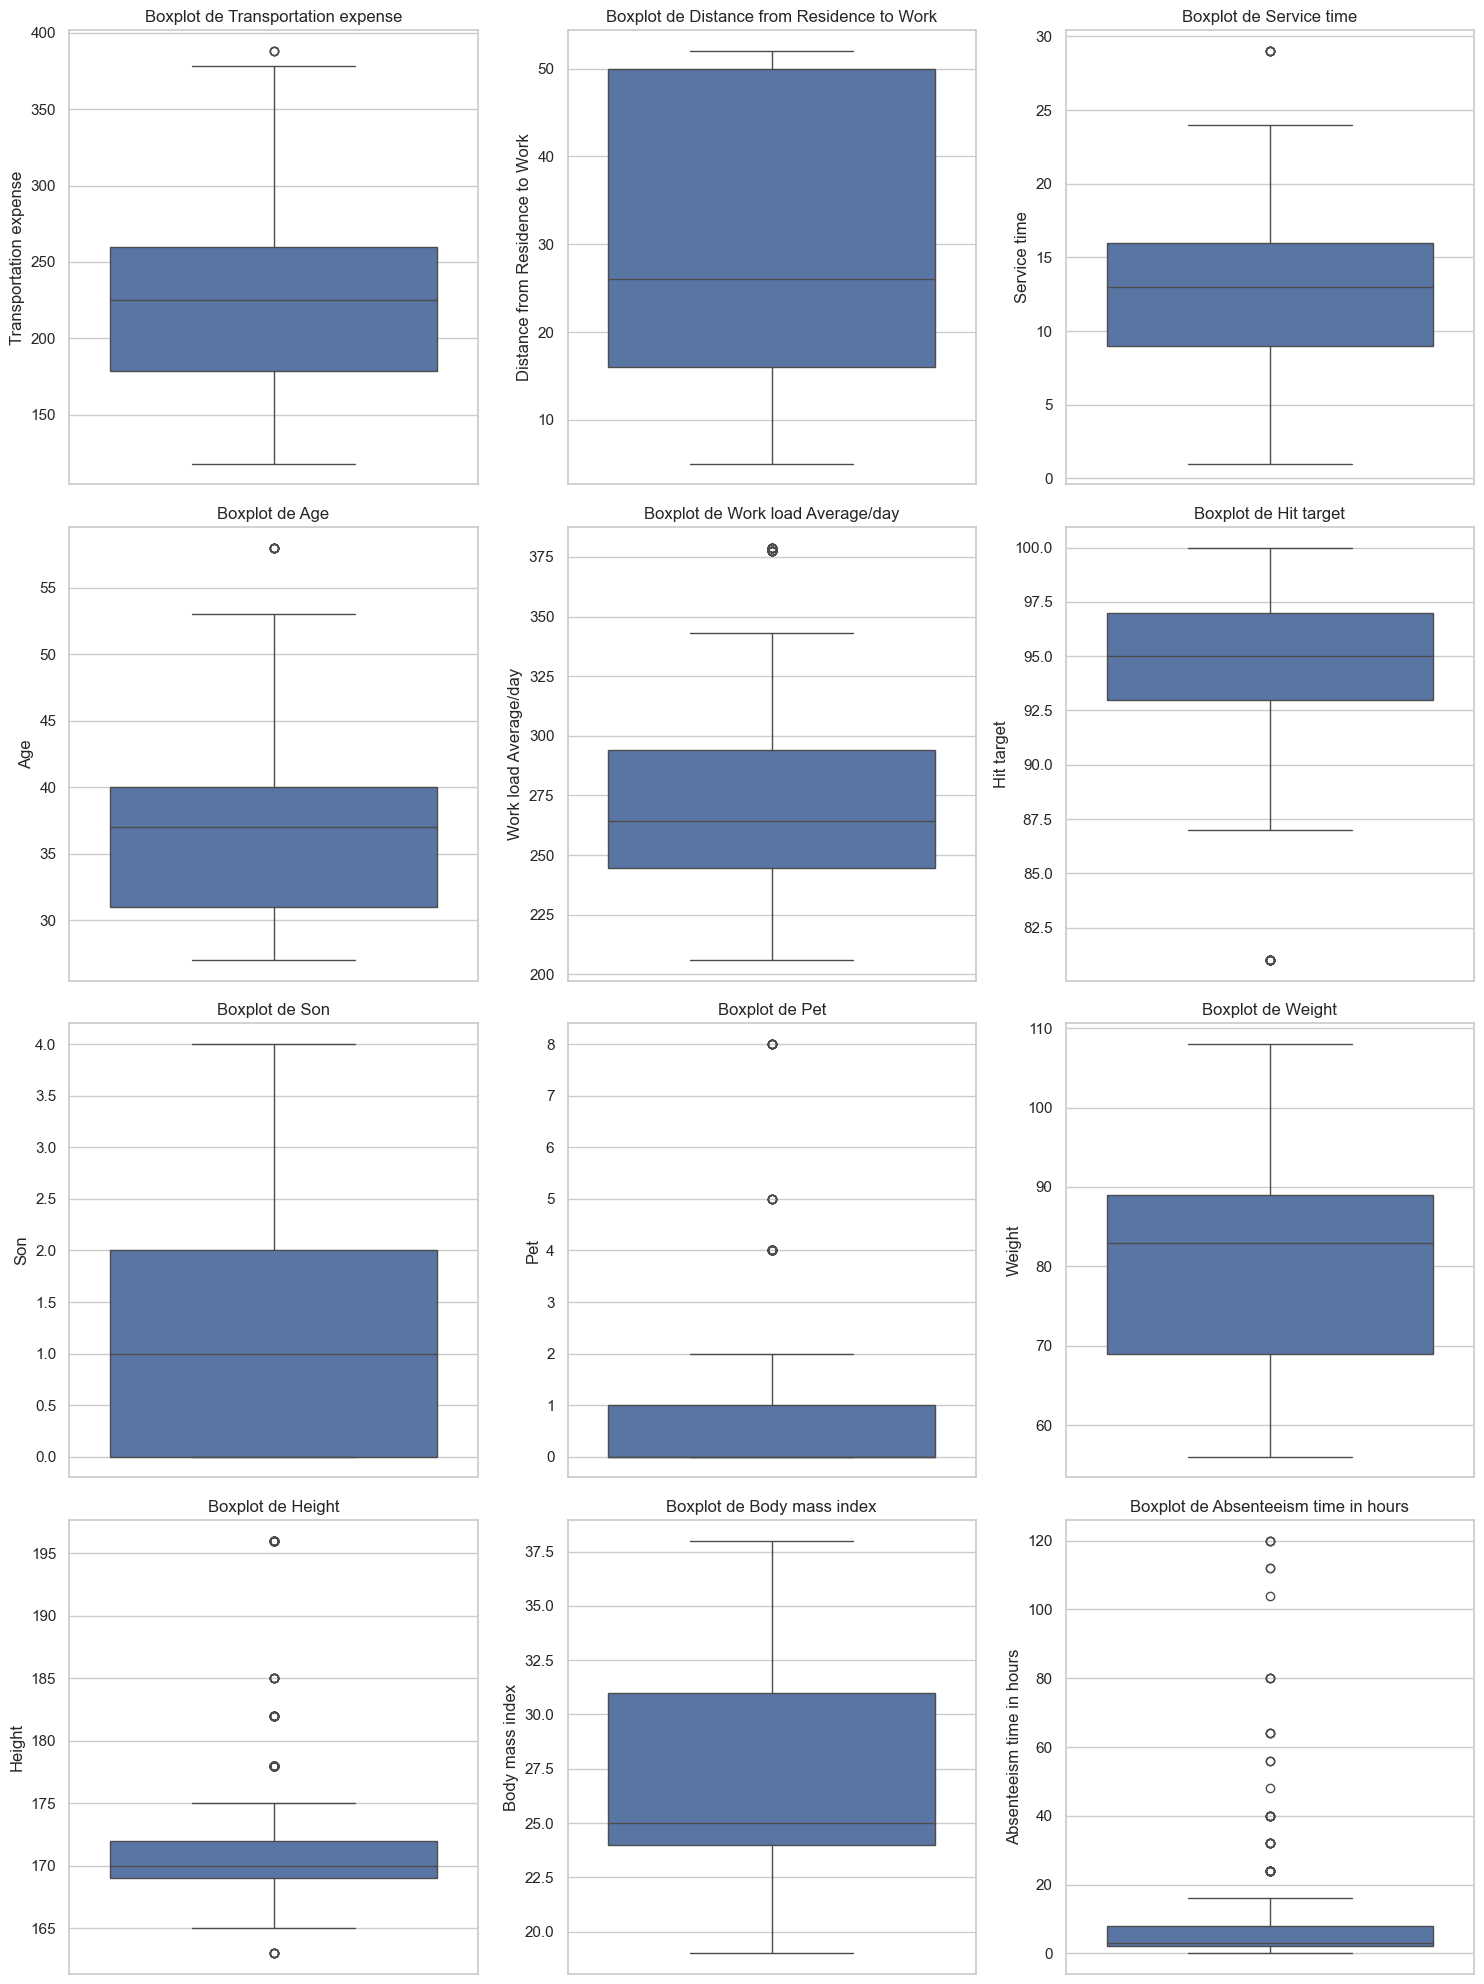

In [22]:
def plot_boxplots(df, num_cols=None, per_row=3):
    """
    Genera boxplots verticales para identificar outliers en las columnas numéricas del DataFrame.
    
    Parámetros:
    -----------
    df : pandas.DataFrame
        DataFrame con los datos.
    num_cols : list, opcional
        Lista de columnas a graficar. Si no se especifica, toma las numéricas.
    per_row : int, opcional
        Número de gráficos por fila (default=3).
    """
    if num_cols is None:
        num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    n = len(num_cols)
    rows = math.ceil(n / per_row)
    
    plt.figure(figsize=(5 * per_row, 5 * rows))
    
    for i, col in enumerate(num_cols, 1):
        plt.subplot(rows, per_row, i)
        sns.boxplot(y=df[col])  # Vertical
        plt.title(f'Boxplot de {col}')
        plt.xlabel("")
        plt.ylabel(col)
    
    plt.tight_layout()
    plt.show()

plot_boxplots(df, num_cols)

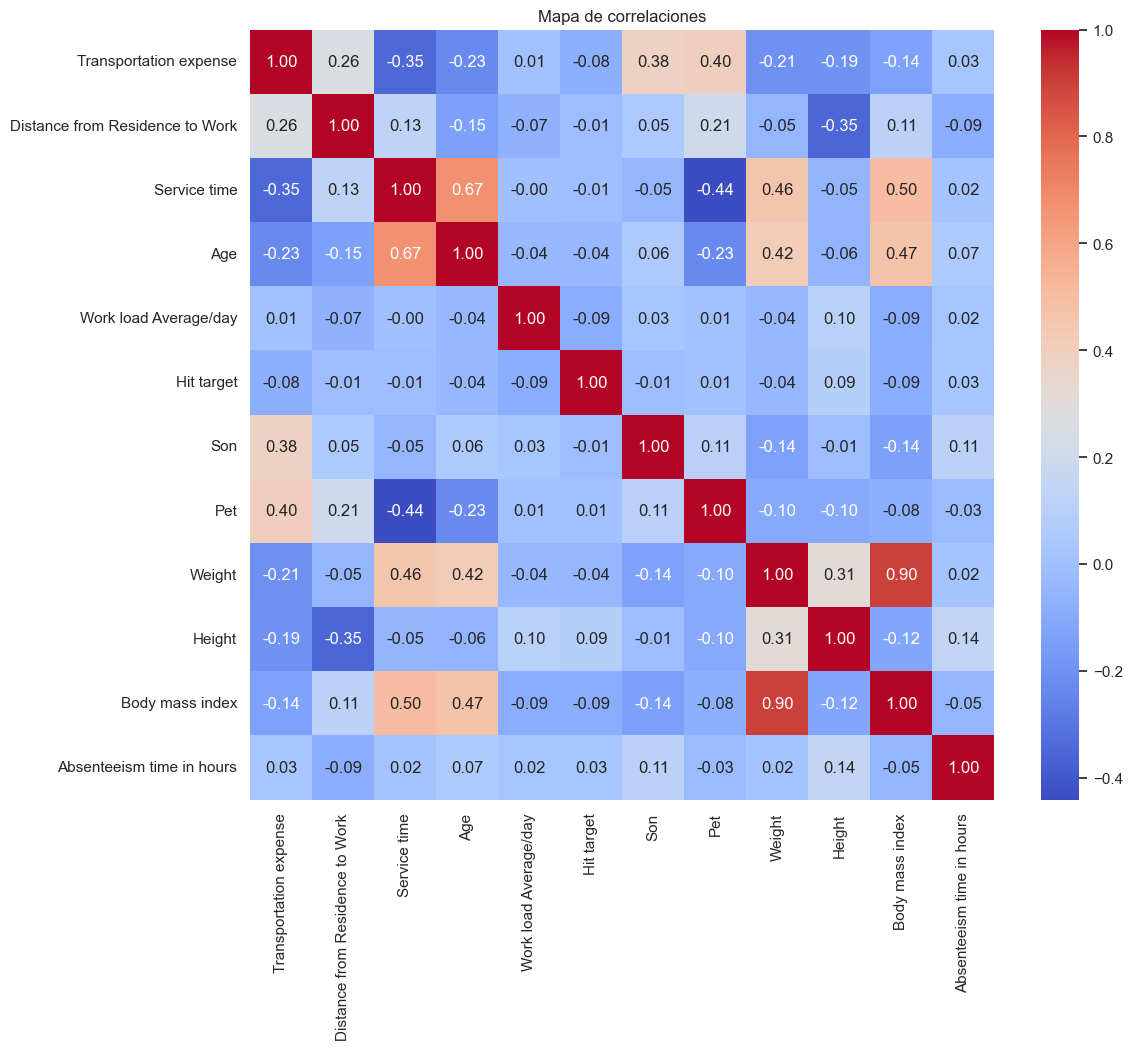

In [23]:
# 6️⃣ Correlaciones entre variables numéricas
plt.figure(figsize=(12,10))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Mapa de correlaciones")
plt.show()

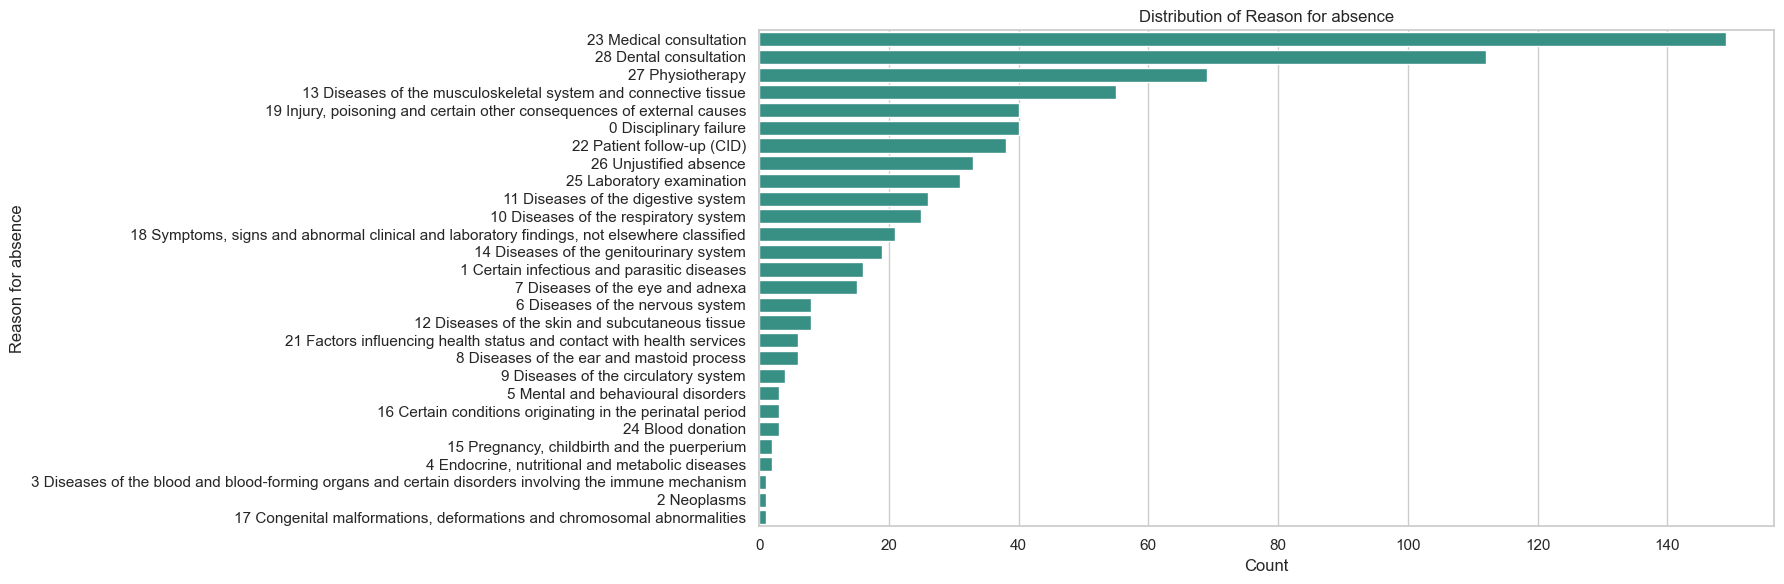

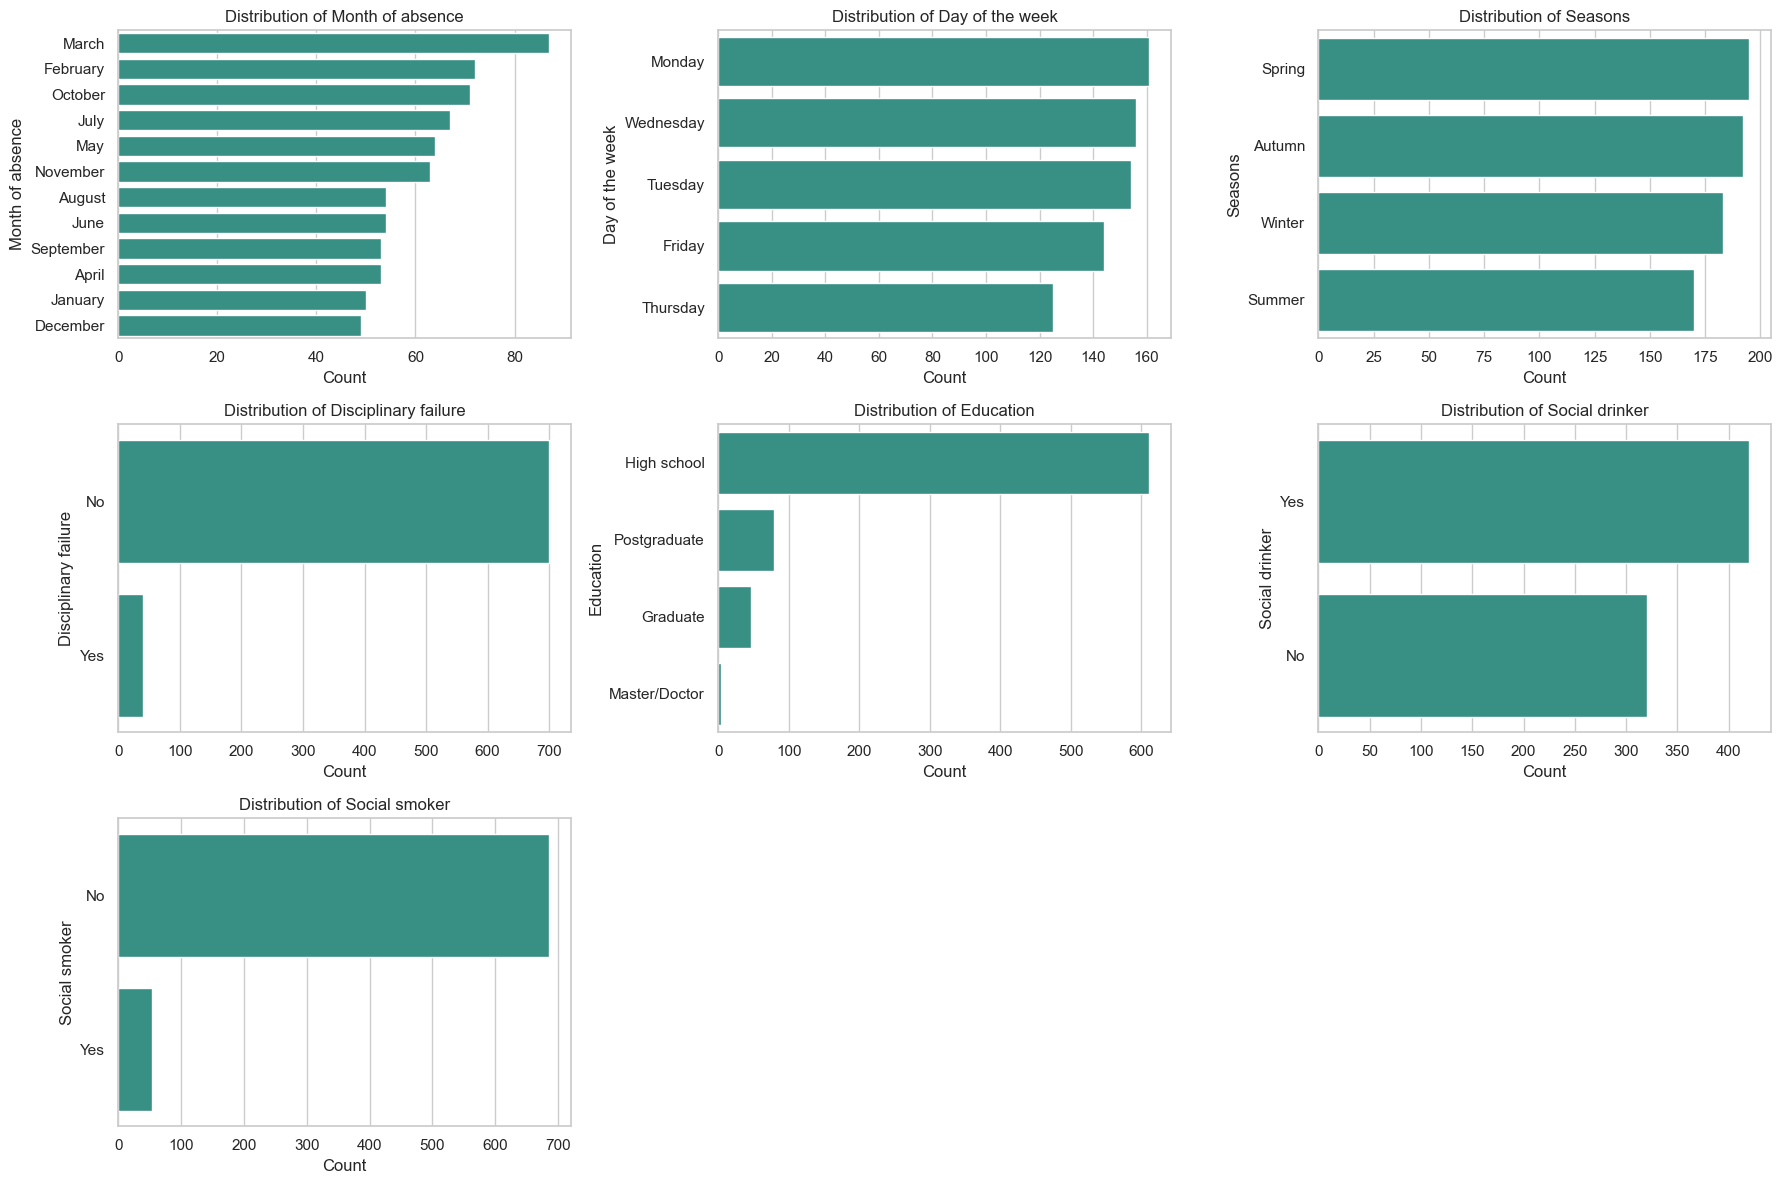

In [24]:
def plot_categorical_distributions(df, cat_cols=None, per_row=3):
    """
    Plots the distribution of categorical variables using countplots.
    The 'Reason for absence' column gets its own full-width row.
    Other categorical variables are displayed 3 per row.

    Parameters
    ----------
    df : pandas.DataFrame
        Input DataFrame containing the data.
    cat_cols : list, optional
        List of categorical columns to plot. If None, it automatically selects object and category types.
    per_row : int, optional
        Number of plots per row (default=3).
    """
    if cat_cols is None:
        cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Handle "Reason for absence" separately if present
    reason_col = None
    if "Reason for absence" in cat_cols:
        reason_col = "Reason for absence"
        cat_cols.remove(reason_col)

    # Total number of remaining categorical columns
    n = len(cat_cols)
    rows = math.ceil(n / per_row)

    # --- Plot the reason column first ---
    if reason_col:
        plt.figure(figsize=(6 * per_row, 6))
        sns.countplot(y=df[reason_col], order=df[reason_col].value_counts().index, color="#2a9d8f")
        plt.title(f"Distribution of {reason_col}")
        plt.xlabel("Count")
        plt.ylabel(reason_col)
        plt.tight_layout()
        plt.show()

    # --- Plot the remaining categorical columns ---
    plt.figure(figsize=(6 * per_row, 4 * rows))

    for i, col in enumerate(cat_cols, 1):
        plt.subplot(rows, per_row, i)
        sns.countplot(y=df[col], order=df[col].value_counts().index, color="#2a9d8f")
        plt.title(f"Distribution of {col}")
        plt.xlabel("Count")
        plt.ylabel(col)

    plt.tight_layout()
    plt.show()


plot_categorical_distributions(df)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def plot_absenteeism_relationships(df, target_col='Absenteeism time in hours', num_cols=None, per_row=3):
    """
    Plots scatterplots showing the relationship between absenteeism time and numeric features.
    Automatically arranges 3 plots per row (customizable).

    Parameters
    ----------
    df : pandas.DataFrame
        Input DataFrame containing numeric columns and target column.
    target_col : str, optional
        Column name representing absenteeism time (default='Absenteeism time in hours').
    num_cols : list, optional
        List of numeric columns to plot. If None, automatically selects numeric columns.
    per_row : int, optional
        Number of plots per row (default=3).
    """
    if target_col not in df.columns:
        print(f"⚠️ Column '{target_col}' not found in DataFrame.")
        return
    
    if num_cols is None:
        num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

    # Exclude target column
    num_cols = [col for col in num_cols if col != target_col]

    n = len(num_cols)
    rows = math.ceil(n / per_row)

    plt.figure(figsize=(6 * per_row, 4 * rows))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(rows, per_row, i)
        sns.scatterplot(x=df[col], y=df[target_col], alpha=0.6, color="#2a9d8f", edgecolor=None)
        plt.title(f'{target_col} vs {col}')
        plt.xlabel(col)
        plt.ylabel(target_col)

    plt.tight_layout()
    plt.show()


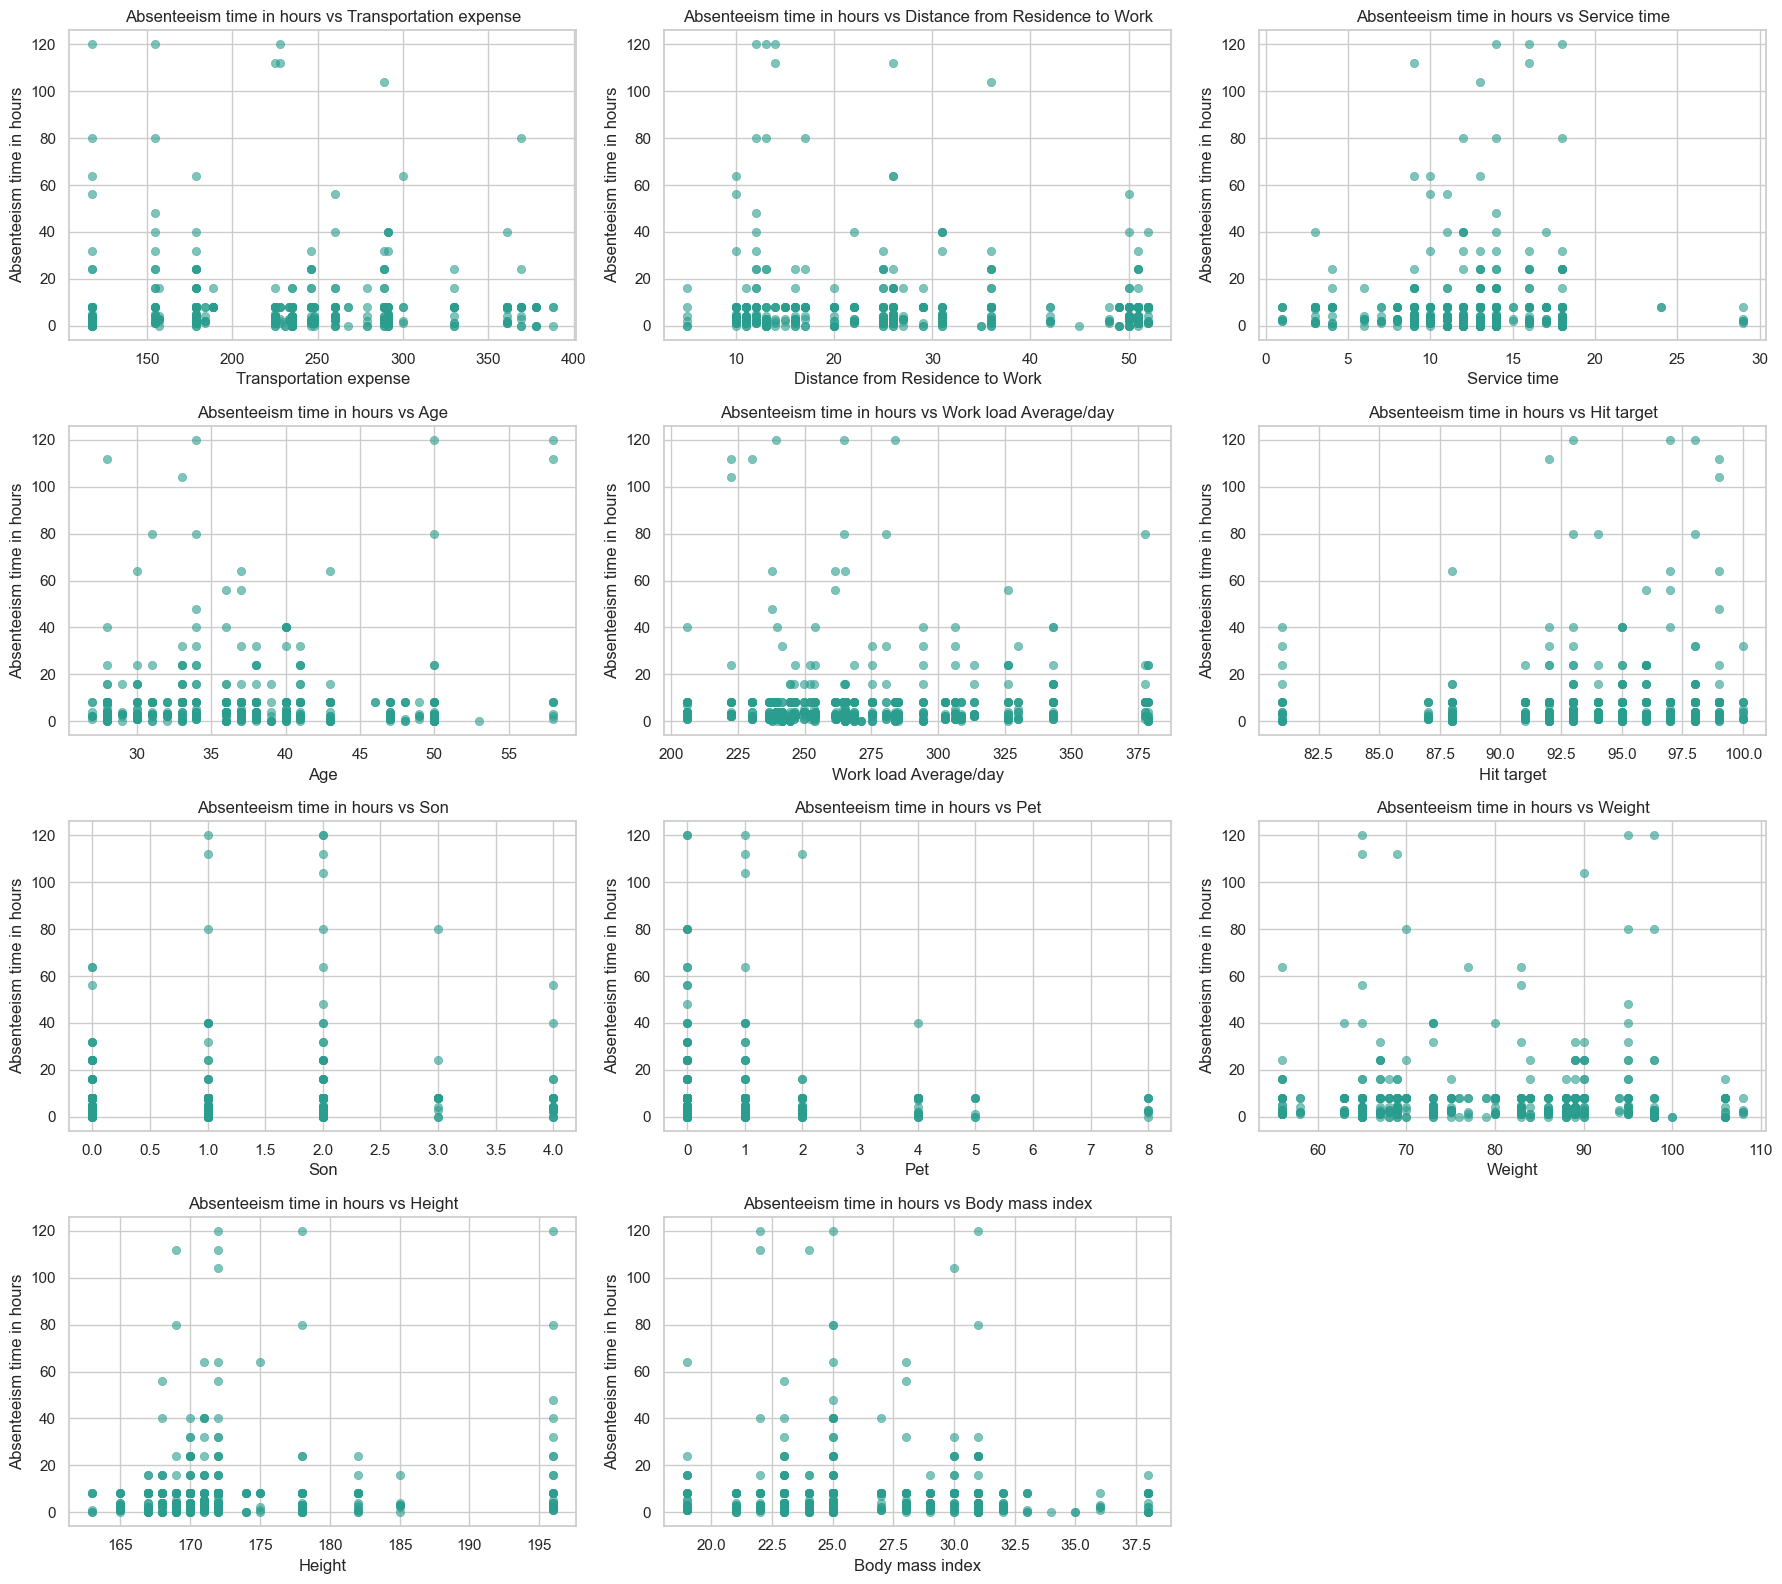

In [26]:
plot_absenteeism_relationships(df)


In [27]:
#Eliminar outliers
def remove_outliers_zscore(df, columns, threshold=3):
    """
    Elimina outliers usando el método del Z-score.
    Se eliminan filas donde |Z| > threshold.
    """
    df_clean = df.copy()
    for col in columns:
        mean = df_clean[col].mean()
        std = df_clean[col].std()
        z_scores = (df_clean[col] - mean) / std
        df_clean = df_clean[np.abs(z_scores) <= threshold]
    return df_clean

def remove_outliers_iqr(df, columns, multiplier=1.5):
    """
    Elimina outliers de las columnas especificadas usando el método IQR.
    Retorna un nuevo DataFrame sin los outliers.
    """
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - multiplier * IQR
        upper = Q3 + multiplier * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

    
def clean_outliers(df, method="iqr", threshold=3, multiplier=1.5):
    """
    Limpia outliers de todas las columnas numéricas del DataFrame.
    method: 'iqr' o 'zscore'
    """
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    if method == "iqr":
        return remove_outliers_iqr(df, numeric_cols, multiplier)
    elif method == "zscore":
        return remove_outliers_zscore(df, numeric_cols, threshold)
    else:
        raise ValueError("Método no válido. Usa 'iqr' o 'zscore'.")

df = clean_outliers(df, method="iqr")



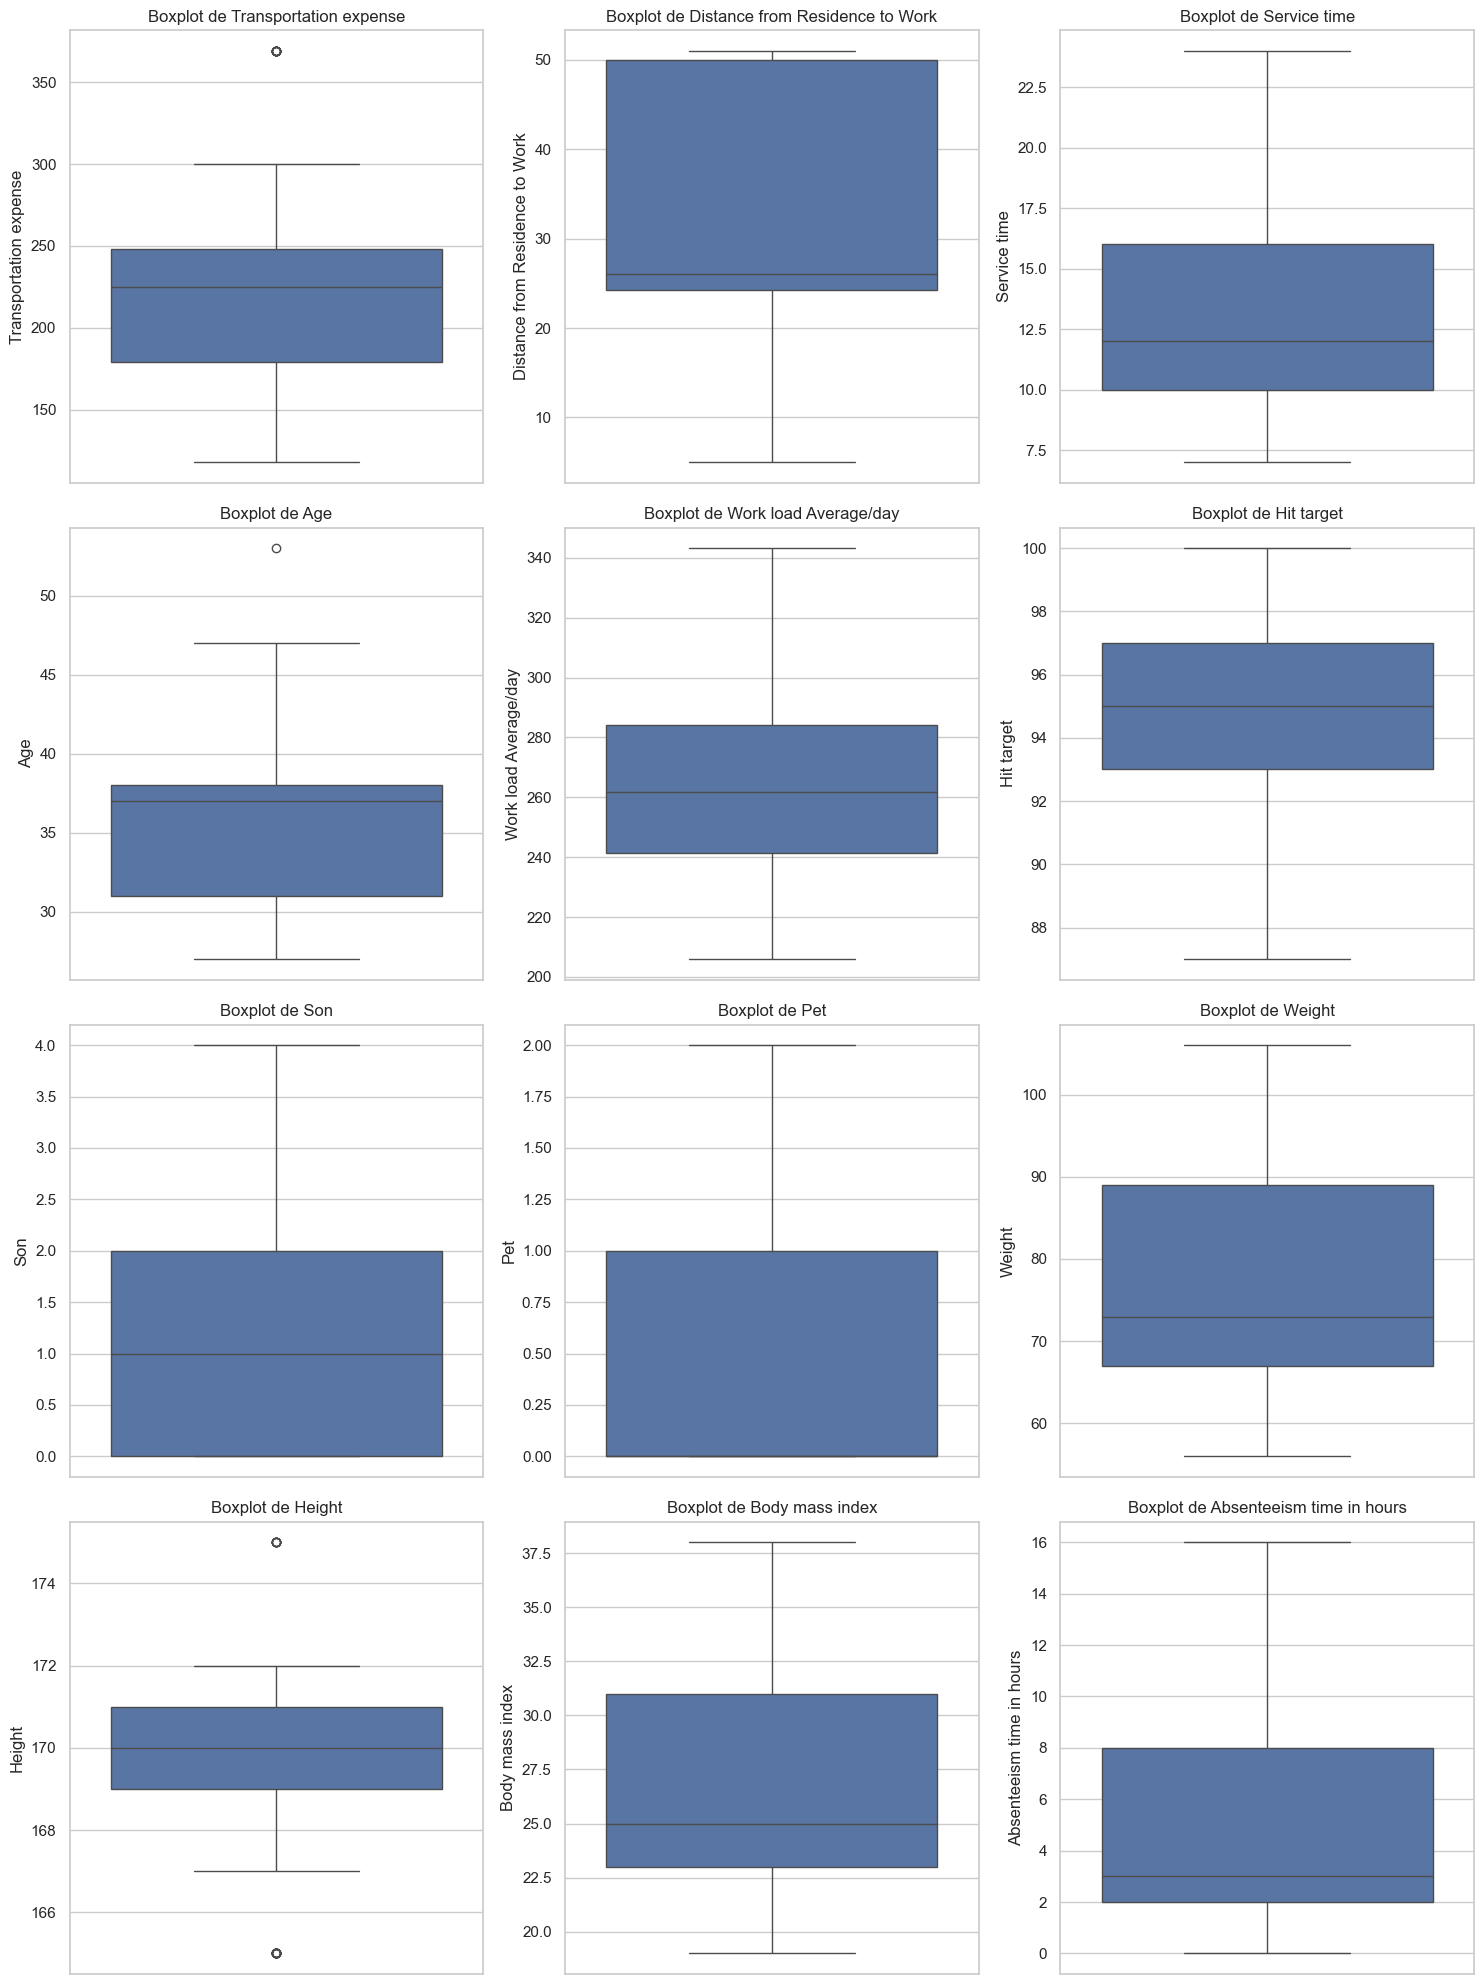

In [28]:
plot_boxplots(df, num_cols)

In [29]:
import numpy as np
import pandas as pd

def create_behavioral_features(df):
    """
    Crea nuevas características relacionadas con estilo de vida, fiabilidad y desempeño laboral.
    """

    df = df.copy()

    binary_cols = ["Social drinker", "Social smoker", "Disciplinary failure"]
    for col in binary_cols:
        if df[col].dtype == object:
            df[col] = df[col].astype(str).str.strip().str.lower().map({
                'yes': 1, 'no': 0, 'true': 1, 'false': 0
            }).fillna(df[col])
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)
        
    # 1️⃣ Lifestyle risk score: suma ponderada de factores de riesgo
    df["Lifestyle_risk_score"] = (
        1.5 * df["Social drinker"] +     # ser bebedor social
        2.0 * df["Social smoker"] +      # fumar es más riesgoso
        1.0 * df["Pet"] +                # tener mascotas implica posibles ausencias
        1.5 * df["Son"] +                # tener hijos implica responsabilidad adicional
        2.0 * df["Disciplinary failure"] # antecedentes disciplinarios
    )

    # 2️⃣ Dependents total y flag
    df["Dependents_count"] = df["Son"] + df["Pet"]
    df["Has_dependents"] = np.where(df["Dependents_count"] > 0, 1, 0)

    # 3️⃣ Has pets or children (versión simplificada de la anterior, pero conservada)
    df["Has_family_or_pets"] = df["Has_dependents"]

    # 4️⃣ Healthy lifestyle (versión inversa del riesgo)
    # Se asume: no fumador (1), no bebedor (1), BMI saludable (18.5–25) → 1, de lo contrario 0
    df["Healthy_lifestyle"] = (
        (1 - df["Social smoker"]) + 
        (1 - df["Social drinker"]) + 
        df["Body mass index"].between(18.5, 25).astype(int)
    )

    # 5️⃣ BMI category
    def categorize_bmi(bmi):
        if bmi < 18.5:
            return "Underweight"
        elif bmi < 25:
            return "Normal"
        elif bmi < 30:
            return "Overweight"
        else:
            return "Obese"
    
    df["BMI_category"] = df["Body mass index"].apply(categorize_bmi)

    # 6️⃣ Penalty risk score
    df["Penalty_risk_score"] = df["Disciplinary failure"] * (1 - df["Hit target"] / 100)

    # 7️⃣ Reliability score
    df["Reliability_score"] = 1 / (1 + df["Absenteeism time in hours"])
    # También podrías normalizarlo:
    df["Reliability_score_norm"] = (df["Reliability_score"] - df["Reliability_score"].min()) / (
        df["Reliability_score"].max() - df["Reliability_score"].min()
    )

    # 8️⃣ Workload deviation
    mean_workload = df["Work load Average/day"].mean()
    df["Workload_deviation"] = df["Work load Average/day"] - mean_workload

    # 9️⃣ Age group: categorical representation of age ranges
    df["Age_group"] = pd.cut(
        df["Age"],
        bins=[0, 30, 45, np.inf],
        labels=["Young", "Middle-aged", "Senior"]
    )

    # 🔟 Service group: employee tenure category
    df["Service_group"] = pd.cut(
        df["Service time"],
        bins=[0, 5, 10, np.inf],
        labels=["Short", "Medium", "Long"]
    )

    # 1️⃣1️⃣ Distance group: proximity of residence to workplace
    df["Distance_group"] = pd.cut(
        df["Distance from Residence to Work"],
        bins=[0, 10, 20, np.inf],
        labels=["Near", "Moderate", "Far"]
    )

    return df


In [30]:
df = create_behavioral_features(df)

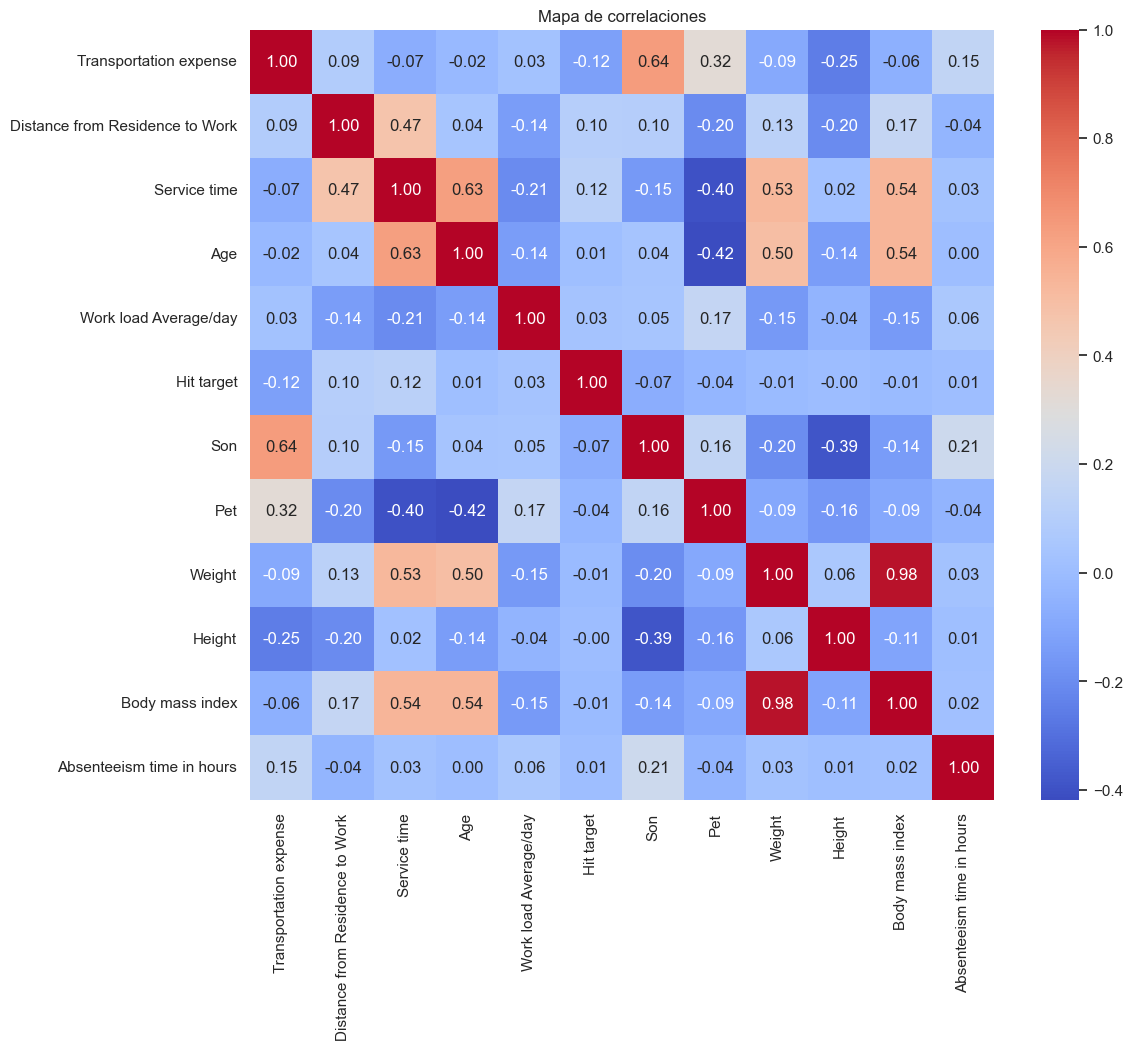

In [31]:
# 6️⃣ Correlaciones entre variables numéricas
plt.figure(figsize=(12,10))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Mapa de correlaciones")
plt.show()

In [32]:
def preprocess_dataset(df, target_col='Absenteeism time in hours'):
    """
    Preprocesses a dataset for machine learning by:
    1. Converting categorical columns to dummy variables.
    2. Normalizing numeric columns (except the target column).

    Parameters
    ----------
    df : pandas.DataFrame
        Input DataFrame containing mixed data types.
    target_col : str, optional
        Column name of the target variable (default='Absenteeism time in hours').

    Returns
    -------
    pandas.DataFrame
        Preprocessed DataFrame ready for model training.
    """
    df = df.copy()

    # Separate categorical and numeric columns
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    # Remove the target column from normalization
    if target_col in num_cols:
        num_cols.remove(target_col)

    # 1️⃣ Convert categorical variables to dummies (one-hot encoding)
    df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype=float)

    # 2️⃣ Normalize numeric columns using StandardScaler
    scaler = StandardScaler()
    df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

    return df_encoded


In [304]:
df = preprocess_dataset(df)

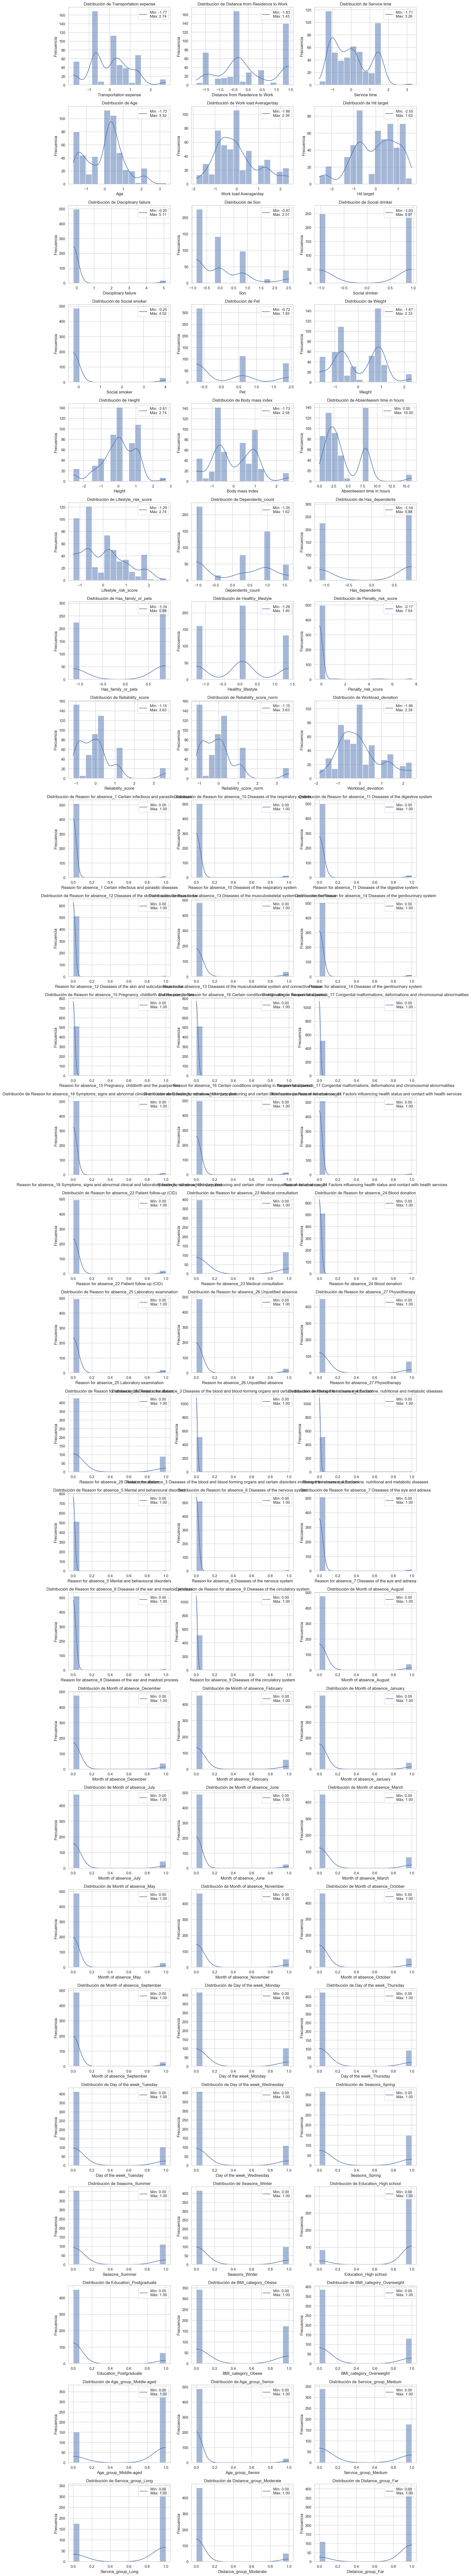

In [305]:
# 4️⃣ Distribución de variables numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns    
plot_distributions(df, num_cols, 3, 15)